#Intro

In [39]:
#Imports
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [40]:
#Take final dataset

df_EUR_M_cap=pd.read_csv('https://raw.githubusercontent.com/GiammarcoBozzelli/SEF/FINAL/df_EUR_monthly_capitalization.csv')
df_EUR_M_RI=pd.read_csv('https://raw.githubusercontent.com/GiammarcoBozzelli/SEF/FINAL/df_EUR_monthly_return.csv')
df_EUR_Y_cap=pd.read_csv('https://raw.githubusercontent.com/GiammarcoBozzelli/SEF/FINAL/df_EUR_yearly_capitalization.csv')
df_EUR_Y_RI=pd.read_csv('https://raw.githubusercontent.com/GiammarcoBozzelli/SEF/FINAL/df_EUR_yearly_return.csv')


Variable name :


df_EUR_M_cap : Monthly capitalization for EUR firms

df_EUR_M_RI: Monthly return index for EUR firms

df_EUR_Y_cap: Yearly capitalization for EUR firms

df_EUR_Y_RI: Yearly return index for EUR firms

df_M_returns: Monthly returns (computed with capitalization) for EUR firms

df_M_returns_annualized: Monthly returns annualized

df_M_volatility: Monthly volatility of EUR firms

df_M_volatility_annualized: Monthly volatility annualized



# Question 1

## Annualized average return

In [41]:
df_EUR_M_RI.set_index('NAME', inplace = True)
df_EUR_M_cap.set_index('NAME', inplace = True)

In [42]:

df_EUR_M_RI.drop(df_EUR_M_RI.columns[:4], axis=1, inplace=True)

df_EUR_M_RI.columns = pd.to_datetime(df_EUR_M_RI.columns)

df_EUR_M_RI_08 = df_EUR_M_RI.loc[:, (df_EUR_M_RI.columns >= pd.to_datetime("2007-01-01"))]

df_EUR_M_RI_T = df_EUR_M_RI_08.T

In [43]:
df_M_returns = df_EUR_M_RI_T.pct_change()

<AxesSubplot:xlabel='NAME'>

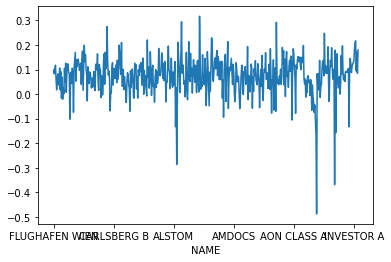

In [69]:
#Now we annualized it
df_M_returns.replace([np.inf, -np.inf], np.nan, inplace=True)
df_M_returns_annualized = df_M_returns.mean() * 12
#And we plot it
df_M_returns_annualized.plot()

OptionError: No such keys(s): 'mode.use_inf_as_null'

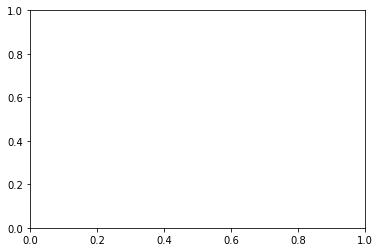

In [70]:
sns.histplot(df_M_returns_annualized)

## Annualized volatility

In [46]:
deviations = df_M_returns - df_M_returns.mean()
squared_deviations = deviations**2
mean_squared_deviations = squared_deviations.mean()

df_M_volatility = np.sqrt(mean_squared_deviations)

In [47]:
df_M_volatility_annualized = df_M_volatility*(12**0.5)

<AxesSubplot:xlabel='NAME'>

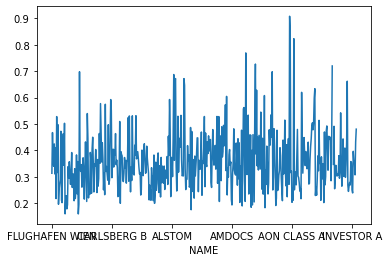

In [48]:
df_M_volatility_annualized.plot()

##Correlation

In [49]:
df_M_returns.corr()

NAME,FLUGHAFEN WIEN,ERSTE GROUP BANK,OMV,VERBUND,WIENERBERGER,VIENNA INSURANCE GROUP A,VOESTALPINE,MAYR-MELNHOF KARTON,IMMOFINANZ,SOLVAY,...,FABEGE,KINNEVIK B,INVESTOR A,SWEDISH MATCH DEAD - DELIST.02/01/23,HEXAGON B,NIBE INDUSTRIER,ELECTROLUX B,ATLAS COPCO A,MODERN TIMES GROUP MTG B,BOLIDEN ORD SHS
NAME,,,,,,,,,,,,,,,,,,,,,
FLUGHAFEN WIEN,1.000000,0.563011,0.501616,0.499605,0.471449,0.623572,0.461207,0.563928,0.466917,0.491600,...,0.371786,0.422274,0.468797,0.285513,0.389913,0.334352,0.395925,0.395054,0.453418,0.334718
ERSTE GROUP BANK,0.563011,1.000000,0.601695,0.527919,0.612858,0.730205,0.529561,0.575977,0.516212,0.693561,...,0.462065,0.521617,0.661790,0.362114,0.532283,0.368265,0.508907,0.536500,0.503673,0.567557
OMV,0.501616,0.601695,1.000000,0.481892,0.437129,0.566825,0.550988,0.576954,0.516486,0.637158,...,0.413331,0.473772,0.480426,0.356773,0.411133,0.322863,0.426079,0.443856,0.421563,0.488802
VERBUND,0.499605,0.527919,0.481892,1.000000,0.410817,0.533057,0.475076,0.482957,0.436344,0.469756,...,0.439132,0.476935,0.525412,0.299445,0.438822,0.351009,0.317555,0.401171,0.375623,0.383349
WIENERBERGER,0.471449,0.612858,0.437129,0.410817,1.000000,0.627346,0.615369,0.528778,0.520221,0.652811,...,0.563730,0.608841,0.663237,0.251434,0.561712,0.518141,0.586415,0.621444,0.564434,0.434293
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
NIBE INDUSTRIER,0.334352,0.368265,0.322863,0.351009,0.518141,0.447080,0.435842,0.399629,0.406543,0.409717,...,0.466596,0.538200,0.577069,0.276464,0.570899,1.000000,0.449978,0.549947,0.424562,0.372856
ELECTROLUX B,0.395925,0.508907,0.426079,0.317555,0.586415,0.537329,0.570320,0.451120,0.441172,0.566379,...,0.512637,0.520470,0.671834,0.336836,0.645958,0.449978,1.000000,0.658460,0.475527,0.555120
ATLAS COPCO A,0.395054,0.536500,0.443856,0.401171,0.621444,0.596458,0.673897,0.521670,0.515376,0.641485,...,0.640817,0.631429,0.806049,0.335394,0.745823,0.549947,0.658460,1.000000,0.613623,0.639032


In [50]:
# Calculate the average returns for each asset
average_returns = df_M_returns.mean()

# Calculate the volatility (standard deviation) for each asset
volatilities = df_M_returns.std()

# Compute the correlation between average returns and volatilities
correlation = average_returns.corr(volatilities)
correlation

c:\Users\giamm\AppData\Local\Programs\Python\Python310\lib\site-packages\pandas\core\nanops.py:1016: RuntimeWarning: invalid value encountered in subtract
  sqr = _ensure_numeric((avg - values) ** 2)


-0.24237289785933855

# Exercice 2

## Equally weighted portfolio

In [51]:
#Creating a vector with equal weights for the 508 firms
n_columns = 508

#df_weight = pd.DataFrame([1/n_columns] * n_columns).T

weight = 1/508

weight

0.001968503937007874

In [52]:
#Equally weighted portfolio (average returns of all firms per each month)
portfolio_returns_EW = (df_M_returns*weight).sum(axis=1)

portfolio_returns_EW.replace([np.inf, -np.inf], np.nan, inplace=True)
portfolio_returns_EW.dropna(inplace=True)


In [53]:
portfolio_returns_EW.index = pd.to_datetime(portfolio_returns_EW.index)

# Filter DataFrame based on the condition
filtered_df = portfolio_returns_EW['2007-12-31':]

In [54]:
EW_returns = filtered_df.pct_change()
EW_returns = EW_returns.dropna(axis=0)

EW_returns_avrg_ann = EW_returns.mean()*12
EW_returns_avrg_ann


-27.434004533951423

In [55]:
portfolio_vol_EW = portfolio_returns_EW.std()*np.sqrt(12)
portfolio_vol_EW

0.22724482680652508

In [71]:
rf_rate = pd.read_csv('https://raw.githubusercontent.com/GiammarcoBozzelli/SEF/FINAL/risk_free_rate_OECD.csv')
# Sharpe ratio with average EUR annualized risk free ratio from OECD euro zone

rfr = rf_rate.OBS_VALUE
avg_rfr = rfr.mean()/100

## Sharpe ratio EV_Portfolio

In [73]:
sr_ev = (EW_returns_avrg_ann - avg_rfr) / portfolio_vol_EW

In [74]:
sr_ev

-120.85418834938541

## Value weighted portfolio

In [75]:
df_EUR_M_cap.drop(df_EUR_M_cap.columns[:4], axis=1, inplace=True)

df_EUR_M_cap.columns = pd.to_datetime(df_EUR_M_cap.columns)

df_EUR_M_cap_08 = df_EUR_M_cap.loc[:, (df_EUR_M_cap.columns >= pd.to_datetime("2007-01-01"))]

df_EUR_M_cap_T = df_EUR_M_cap_08.T

weights = df_EUR_M_cap_T.div(df_EUR_M_cap.T.sum(axis=1), axis=0).mean()

weights

NAME
FLUGHAFEN WIEN              0.000249
ERSTE GROUP BANK            0.001761
OMV                         0.001728
VERBUND                     0.000858
WIENERBERGER                0.000300
                              ...   
NIBE INDUSTRIER             0.000544
ELECTROLUX B                0.000851
ATLAS COPCO A               0.002937
MODERN TIMES GROUP MTG B    0.000281
BOLIDEN ORD SHS             0.000692
Length: 508, dtype: float64

In [76]:
# Calculate weights for each month based on previous month's capitalization

total_cap_previous = df_EUR_M_cap.T.sum(axis=1)
weights = df_EUR_M_cap_T.div(total_cap_previous, axis=0).mean()

# Calculate the value-weighted portfolio returns
portfolio_returns_VW = (df_M_returns* weights).sum(axis=1)
portfolio_returns_VW

2007-01-31    0.000000
2007-02-28    0.000500
2007-03-31    0.036127
2007-04-30    0.067192
2007-05-31    0.018955
                ...   
2022-08-31   -0.053479
2022-09-30   -0.089615
2022-10-31    0.081919
2022-11-30    0.109852
2022-12-31    0.005090
Length: 192, dtype: float64

In [77]:
portfolio_returns_VW.index = pd.to_datetime(portfolio_returns_VW.index)

# Filter DataFrame based on the condition
filtered_df = portfolio_returns_VW['2007-12-31':]

In [78]:
VW_returns = filtered_df.pct_change()
VW_returns[VW_returns < 0] = 0
VW_returns_avrg_ann = VW_returns.mean()*12
VW_returns_avrg_ann

10.041923993856473

In [79]:
cov_m = df_M_returns.cov()
cov_m

NAME,FLUGHAFEN WIEN,ERSTE GROUP BANK,OMV,VERBUND,WIENERBERGER,VIENNA INSURANCE GROUP A,VOESTALPINE,MAYR-MELNHOF KARTON,IMMOFINANZ,SOLVAY,...,FABEGE,KINNEVIK B,INVESTOR A,SWEDISH MATCH DEAD - DELIST.02/01/23,HEXAGON B,NIBE INDUSTRIER,ELECTROLUX B,ATLAS COPCO A,MODERN TIMES GROUP MTG B,BOLIDEN ORD SHS
NAME,,,,,,,,,,,,,,,,,,,,,
FLUGHAFEN WIEN,0.008233,0.006911,0.004828,0.004463,0.005255,0.005089,0.004973,0.003225,0.006474,0.004084,...,0.003494,0.003921,0.003087,0.001792,0.004061,0.003129,0.003736,0.003189,0.005146,0.004223
ERSTE GROUP BANK,0.006911,0.018300,0.008634,0.007031,0.010185,0.008884,0.008513,0.004911,0.010671,0.008591,...,0.006474,0.007221,0.006497,0.003389,0.008265,0.005139,0.007160,0.006456,0.008522,0.010676
OMV,0.004828,0.008634,0.011251,0.005032,0.005696,0.005407,0.006945,0.003857,0.008372,0.006188,...,0.004541,0.005143,0.003698,0.002618,0.005005,0.003533,0.004700,0.004188,0.005593,0.007209
VERBUND,0.004463,0.007031,0.005032,0.009692,0.004968,0.004720,0.005558,0.002996,0.006564,0.004235,...,0.004477,0.004805,0.003754,0.002040,0.004958,0.003564,0.003251,0.003513,0.004625,0.005248
WIENERBERGER,0.005255,0.010185,0.005696,0.004968,0.015092,0.006931,0.008984,0.004094,0.009766,0.007343,...,0.007172,0.007655,0.005913,0.002137,0.007920,0.006566,0.007492,0.006792,0.008673,0.007419
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
NIBE INDUSTRIER,0.003129,0.005139,0.003533,0.003564,0.006566,0.004148,0.005343,0.002598,0.006409,0.003870,...,0.004985,0.005682,0.004320,0.001973,0.006759,0.010641,0.004828,0.005047,0.005478,0.005348
ELECTROLUX B,0.003736,0.007160,0.004700,0.003251,0.007492,0.005026,0.007049,0.002957,0.007012,0.005394,...,0.005522,0.005540,0.005071,0.002424,0.007711,0.004828,0.010817,0.006092,0.006186,0.008028
ATLAS COPCO A,0.003189,0.006456,0.004188,0.003513,0.006792,0.004772,0.007125,0.002925,0.007006,0.005225,...,0.005904,0.005749,0.005204,0.002064,0.007615,0.005047,0.006092,0.007914,0.006828,0.007905


In [80]:
def portfolio_vol(weights, covmat):
    """
    Computes the vol of a portfolio from a covariance matrix and constituent weights
    weights are a numpy array or N x 1 maxtrix and covmat is an N x N matrix
    """
    return (weights.T @ covmat @ weights)**0.5

In [81]:
portfolio_vol_VW = portfolio_vol(weights, cov_m)
portfolio_vol_VW

0.058672869309416426

In [82]:
portfolio_returns_VW.replace([np.inf, -np.inf], np.nan, inplace=True)
portfolio_returns_VW.dropna(inplace=True)

portfolio_vol_VW = portfolio_returns_VW.std()*np.sqrt(12)
portfolio_vol_VW

0.20272146385466253

In [83]:
sr_vw = (VW_returns_avrg_ann - avg_rfr) / portfolio_vol_VW

In [84]:
sr_vw

49.390129871432286

## Question 4

In [ ]:
# get the return interests to calculate portfolio returns
df_EUR_M_RI = df_EUR_M_RI.iloc[:, 4:]

In [ ]:

df_transposed = df_EUR_M_RI.transpose().reset_index()

# Set the column names to be the values from the second row
df_transposed.columns = df_transposed.iloc[0]

# Drop the second row which now contains the original column names
df_transposed = df_transposed.drop(0)

# Reset the index
df_transposed = df_transposed.reset_index(drop=True)


df_transposed = df_transposed.rename(columns={'NAME': 'DATE'})

df_transposed

In [ ]:

df_transposed.iloc[:, 0] = pd.to_datetime(df_transposed.iloc[:, 0])

# Change the other columns to float
df_transposed.iloc[:, 1:] = df_transposed.iloc[:, 1:].astype(float)


In [ ]:
exp_returns = pd.DataFrame()
exp_returns['FIRMS'] = None
exp_returns['RETURNS'] = 0

In [ ]:
df_transposed_08 =  df_transposed[df_transposed['DATE'] < pd.Timestamp('2008-01-01')]

In [ ]:
exp_returns['FIRMS'] =  df_transposed.columns.tolist()[1:]
exp_returns['RETURNS'] = df_transposed.iloc[:, 1:].pct_change().mean().tolist()
exp_returns

In [ ]:
df_transposed.set_index("DATE", inplace=True)

In [ ]:
window=96
Covar=df_transposed.pct_change().rolling(window).cov()

In [ ]:
cov_m = Covar.loc["2008-01-31"]
cov_m

In [ ]:
bounds = tuple((0, 1) for asset in range(len(exp_returns)))

In [ ]:
from scipy.optimize import minimize

def cons():
    constraints = [{'type': 'eq', 'fun': lambda weights: np.sum(weights) - 1}]
    bounds = tuple((0, 1) for asset in range(len(exp_returns)))
    in_weights = np.ones(len(exp_returns)) / len(exp_returns)
    return constraints, bounds, in_weights 

constraints, bounds, in_weights = cons()

def objective_function(weights,cov_m):
    return weights.T @ cov_m @ weights

def optimal_portfolio(weights,cov):
    x = minimize(
    objective_function,
    in_weights,
    cov_m,
    method='SLSQP',
    bounds=bounds,
    constraints=constraints)
    return x

optimal_portfolio(in_weights,cov_m)

## Rolling Window

In [ ]:
# Define the start and end years for the rolling window + initial weight df
start_year = 2000
end_year = 2022

returns = df_transposed.pct_change()
optimal_weights_df = pd.DataFrame()

# Loop over each year from the end of 2007 to the end of 2022
for year in range(2007, end_year + 1):
    start_date = f"{year - 7}-12-31" 
    end_date = f"{year}-12-31"

    filtered_rows = returns.loc[(returns.index >= start_date) & (returns.index <= end_date)]
    
    # Calculate the expected returns for the current rolling window
    ER = filtered_rows.mean(axis=1)
    ER = ER.to_frame(name=f'expected_returns_{year}')
    
    # Calculate the covariance matrix for the current rolling window
    transposed_df = filtered_rows.T
    transposed_df = transposed_df.astype(float)
    CM = transposed_df.cov()

    optimal_weights_df[f'Weights_{year}'] = optimal_portfolio(in_weights,CM).x

## Ex-Post Returns

In [ ]:
portfolio_returns = []

for year in range(2007, end_year):
    # Weights at the end of year Y
    weights = optimal_weights_df[f'Weights_{year}'].values
    updated_weights = weights.copy()

    # Returns for each month of year Y + 1
    for month in range(1, 13):
        month_index = f"{year + 1}-{str(month).zfill(2)}"
        if month_index not in returns.columns:
            continue

        # Calculate the portfolio return for the current month
        monthly_stock_returns = returns[month_index].values
        portfolio_return = np.dot(updated_weights, monthly_stock_returns)
        portfolio_returns.append(portfolio_return)
        
        # Update and normalize the weights for the next month
        updated_weights = updated_weights * (1 + monthly_stock_returns)
        updated_weights /= (1 + portfolio_return)

ex_post_ret = exp_returns.copy()
ex_post_ret['RETURNS'] = updated_weights

ex_post_ret

## Portfolio statistics

In [ ]:

average_return = ex_post_ret['RETURNS'].mean() * 12
volatility = ex_post_ret['RETURNS'].std() * np.sqrt(12)

rf_rate = pd.read_csv('https://raw.githubusercontent.com/GiammarcoBozzelli/SEF/FINAL/risk_free_rate_OECD.csv')

In [ ]:
# Sharpe ratio with average EUR annualized risk free ratio from OECD euro zone
rfr = rf_rate.OBS_VALUE
avg_rfr = rfr.mean()/100 # average annual risk free rate across all european countries over the 2000 - 2022 period

In [ ]:
#calculate the sharpe ratio with excess returns wrt average risk free rate
sharpe_ratio = (average_return - avg_rfr) / volatility

# Calculate the minimum and maximum return
min_return = ex_post_ret['RETURNS'].min()
max_return = ex_post_ret['RETURNS'].max()

from tabulate import tabulate

results = {
    "Annualized Average Return": average_return,
    "Annualized Volatility": volatility,
    "Sharpe Ratio": sharpe_ratio,
    "Minimum Return": min_return,
    "Maximum Return": max_return
}

table = []
for key, value in results.items():
    table.append([key, value])

print(tabulate(table, headers=["Out-of-Sample", "Value"]))


### Comparison with the Value-Weighted Portfolio

In [ ]:
from tabulate import tabulate

# Out of sample results
results = {
    "Annualized Average Return": average_return,
    "Annualized Volatility": volatility,
    "Sharpe Ratio": sharpe_ratio,
    "Minimum Return": min_return,
    "Maximum Return": max_return
}

# Value Weighted results
results_vw = {
    "Annualized Average Return": portfolio_returns_VW.mean(),
    "Annualized Volatility": portfolio_vol_VW,
    "Sharpe Ratio": sr_vw,
    "Minimum Return": portfolio_returns_VW.min(),
    "Maximum Return": portfolio_returns_VW.max()
}

table_data = []
for key in results.keys():
    table_data.append([key, results[key], results_vw[key]])
print(tabulate(table_data, headers=["Metric", "Original Portfolio", "Value Weighted Portfolio"]))